<a href="https://colab.research.google.com/github/caasalazarsa/iot1/blob/main/QRtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-double3
  libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libjxr-tools libjxr0
  liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x libfftw3-bin libfftw3-dev inkscape poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-

In [2]:
!pip install pyzbar

[INFO] Found EAN13 barcode: 0705632441947


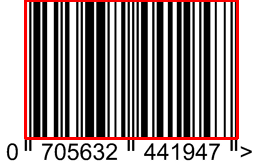

In [7]:
from google.colab.patches import cv2_imshow

from pyzbar import pyzbar
import argparse
import cv2


# load the input image
image = cv2.imread("testbarcode2.png")
#image = cv2.imread("testbarcode.png")
#image = cv2.imread("testqr.jpg")
# find the barcodes in the image and decode each of the barcodes
barcodes = pyzbar.decode(image)


# loop over the detected barcodes
for barcode in barcodes:
	# extract the bounding box location of the barcode and draw the
	# bounding box surrounding the barcode on the image
	(x, y, w, h) = barcode.rect
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
	# the barcode data is a bytes object so if we want to draw it on
	# our output image we need to convert it to a string first
	barcodeData = barcode.data.decode("utf-8")
	barcodeType = barcode.type
	# draw the barcode data and barcode type on the image
	text = "{} ({})".format(barcodeData, barcodeType)
	cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (0, 0, 255), 2)
	# print the barcode type and data to the terminal
	print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData))
# show the output image
cv2_imshow(image)

